### ***1: INTRO***
* Torch has diffrent domains ie:
    - text
    - Audio
    - Recomendation
    - Vision

* Data used in here id from https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi.zip

### **Getting the data**

In [ ]:
import  requests
from pathlib import Path
import zipfile

In [ ]:
data_dir = Path("data")
images_path = data_dir / "Image"
source_link = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip"
if images_path.is_dir():
  pass
else:
  images_path.mkdir( parents = True ,exist_ok = True)

  with open(images_path/'data.zip' , 'wb') as f:

    req = requests.get(source_link)
    f.write(req.content)

  with zipfile.ZipFile(images_path /'data.zip' , 'r') as zip_ref:
    zip_ref.extractall(images_path)

### ***2: Data Exploration***


In [ ]:
import os

for root_dir , dirs , images in os.walk(images_path):
  print(f"There are {len(dirs)} directories and {len(images)} in {root_dir}")

There are 2 directories and 1 in data/Image
There are 3 directories and 0 in data/Image/train
There are 0 directories and 78 in data/Image/train/pizza
There are 0 directories and 75 in data/Image/train/steak
There are 0 directories and 72 in data/Image/train/sushi
There are 3 directories and 0 in data/Image/test
There are 0 directories and 25 in data/Image/test/pizza
There are 0 directories and 19 in data/Image/test/steak
There are 0 directories and 31 in data/Image/test/sushi


In [ ]:
train_dir = images_path / "train"
test_dir = images_path / 'test'


In [ ]:
# Getting all te images
random_images = list(images_path.glob("*/*/*.jpg"))
len(random_images)

300

Height 384 , Widht 512 Class pizza


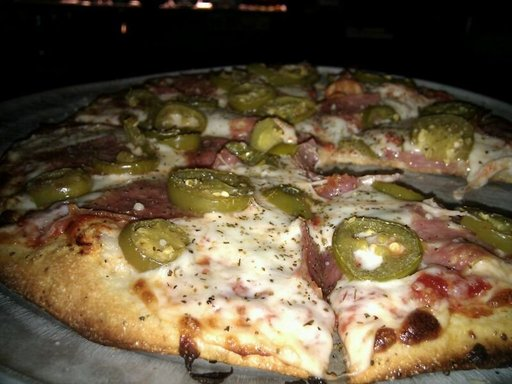

In [ ]:
import random
from PIL import Image

lucky_image = random.choice(random_images)
img_class = lucky_image.parent.stem

img = Image.open(lucky_image)
print(f"Height {img.height} , Widht {img.width} Class {img_class}")
img

(384, 512, 3)


Text(0.5, 1.0, '(384, 512, 3) || pizza')

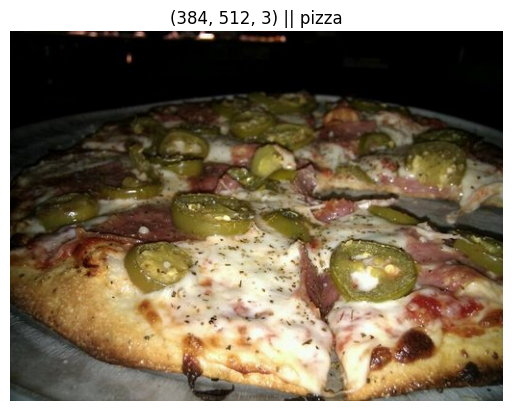

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
img_arr = np.array(img)

print(img_arr.shape)
plt.imshow(img_arr)
plt.axis(False)
plt.title(f"{img_arr.shape} || {img_class}")


### ***Transfroming the data***
* We will use the `torchvision.transform`

- Flip  
- Crop
- Convert ot tensor

In [ ]:
import torch
from torch.utils.data import DataLoader
from  torchvision import datasets , transforms
import math

In [ ]:
transformer = transforms.Compose([
  transforms.Resize(size = (64 , 64)),
  transforms.RandomHorizontalFlip(p = 0.5),
  transforms.ToTensor(),
  # transforms.ToDtype(torch.float32)
  ]
  )
## Creating the Datasest classes
train_dataset = datasets.ImageFolder(
    root = train_dir,
    transform = transformer,
    target_transform=None

)

test_dataset = datasets.ImageFolder(
    root = test_dir ,
    transform = transformer,
    target_transform = None
)
mapping_dict = train_dataset.class_to_idx
reverse_mapping_dict = {v:k for k , v in mapping_dict.items()}
reverse_mapping_dict

{0: 'pizza', 1: 'steak', 2: 'sushi'}

Cols 4  Rows 3 , 10


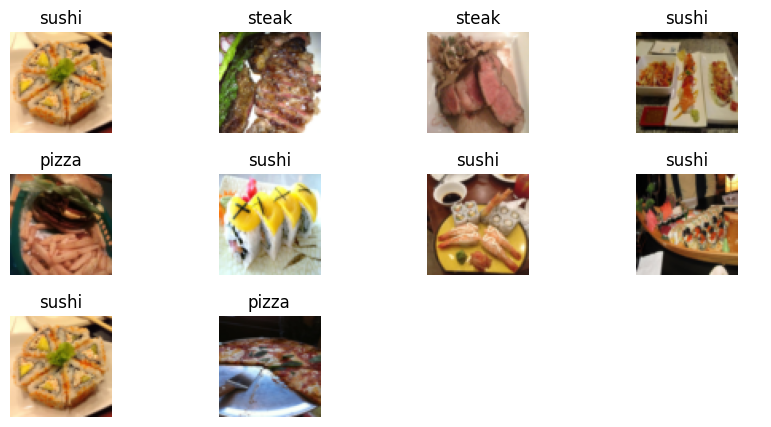

In [ ]:

def plot(data ,  reverse_mapping_dict =  reverse_mapping_dict):

  cols = round(math.sqrt(len(data)))
  rows = math.ceil(len(data) / cols)

  cols_ = max(rows , cols)
  rows_ = min(rows , cols)
  print(f"Cols {cols_}  Rows {rows_} , {len(data)}")
  fig , axs = plt.subplots(rows_ , cols_ , figsize = (10 , 5))
  fig.subplots_adjust(wspace=0.4, hspace=0.4)

  taken = []

  for row in range( rows_ ):
    for col in range( cols_ ):
      img_idx = row * cols_ + col
      if img_idx < len(data):
        image = data[img_idx][0]
        image = image.squeeze()
        img_key = int(data[img_idx][1])
        label = reverse_mapping_dict[img_key]

        if image.shape[0] == 3:
          image = image.permute(1 , 2 , 0)

        axs[row , col].imshow( image, cmap = 'gray')
        axs[row , col].axis("off")
        axs[row , col].set_title(label)
      else:
        axs[row , col].axis("off")


  return fig


data = []
for i in range(10):
    img_idx = random.randint(0 , len(test_dataset))
    data.append(test_dataset[img_idx])



fig = plot(data)

### ***Turning the dataset into a data loader***

In [ ]:
BATCH_SIZE = 32
train_dataloader = DataLoader(train_dataset,
                              batch_size = BATCH_SIZE,
                              shuffle = True,
                              num_workers = int(os.cpu_count()/2))

test_dataloader = DataLoader(test_dataset,
                         batch_size = BATCH_SIZE,
                         shuffle = True)

Cols 6  Rows 6 , 32


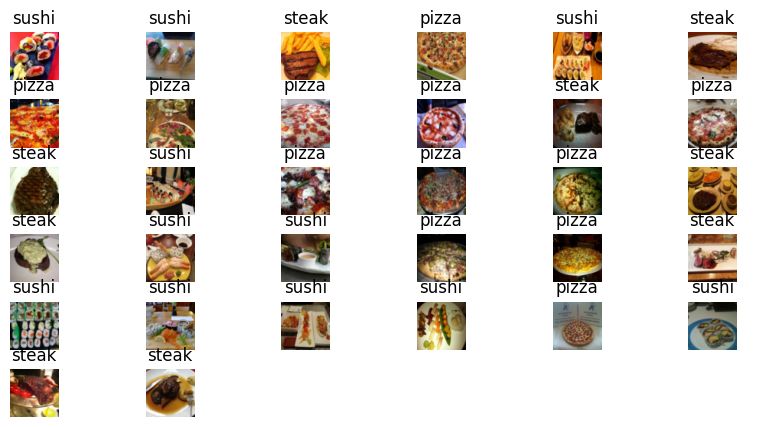

In [ ]:
images , labels = next(iter(test_dataloader))
data = list(zip(images , labels))
f = plot(data)

### ***CREATING CUSTOM DATASET CLASSES***

* The class is biult on top of the `torch.utils.data.Dataset`
* After subclassing it you should overwrite `__len__ ()`and `__getitem__()`

Source: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

In [ ]:
import os
from pathlib import Path
from PIL import Image

import torch
from torch.utils.data import Dataset
from torchvision import transforms

from typing import Tuple , Dict , List

In [ ]:
### gettin the names using the os.scandir


target_dir  = train_dir

def find_classes(target_dir:str) -> Tuple[List[str] , Dict[str , int]]:
  """Findes class names  and returns a mapping dict and names list
     rasises an FileNotFoundError if no classes found
  """
  names = sorted([entry.name for entry in os.scandir(target_dir) if entry.is_dir()])

  if not names:
    raise FileNotFoundError(f"No names found in {target_dir}")
  mapping_dict = {name: idx  for idx  , name in enumerate(names)}

  return names , mapping_dict

names , classes_to_idx  =find_classes(train_dir)

names , classes_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
k = [9 , 8 , 0]


In [ ]:
k.__getitem__(1)

8

In [ ]:
k.__len__()

3

### **TODO**

* subclass the `torch.utils.data.Dataset`

* Create some attributes:
    - paths -> list of paths to our images
    - classes -. List of classes
    - classes_to_idx -. dict of classes and repective index
    - transform  -. The transform we want to be applied to our data
* write a funtion to load the images
* overwrite the `__getitem__()` and `__len__()`

    


In [ ]:

class CustomDataset(torch.utils.data.Dataset):

    def __init__(self , source_dir , transform= None):
      super().__init__()

      self.parent_dir = Path(source_dir)
      self.paths = list(self.parent_dir.glob("*/*.jpg"))

      self.transform = transform
      self.classes , self.classes_to_idx = find_classes(source_dir)

    def load_image(self , image_idx:int) -> Image.Image:
      """Takes in an image index and indexes it in the self.paths
      Retun a PIL image"""
      return Image.open(self.paths[image_idx])

    ## overwrite __len__()

    def __len__(self) -> int:
      """returns len(self.paths)"""

      return len(self.paths)

    ## Overwrite the __getitem__()

    def __getitem__(self , idx)-> Tuple[torch.Tensor , int]:
      """Returns a tuple of (x,y) from the data"""
      image_path = self.paths[idx]
      image_dir_name = image_path.parent.name

      pil_image = self.load_image(idx)
      image_label = self.classes_to_idx[image_dir_name]

      if self.transform:
        return self.transform(pil_image) , image_label

      else:
        return pil_image , image_label





In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(size = (64 , 64)),
    transforms.RandomHorizontalFlip(p = 0.6),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size = (64 , 64)),
    transforms.ToTensor()
])

train_data = CustomDataset(source_dir = train_dir,
                           transform = train_transform)

test_data = CustomDataset(source_dir = test_dir,
                          transform = test_transform)

[12, 218, 79, 72, 68, 211, 189, 134, 196, 2, 111, 18]
Cols 4  Rows 3 , 12


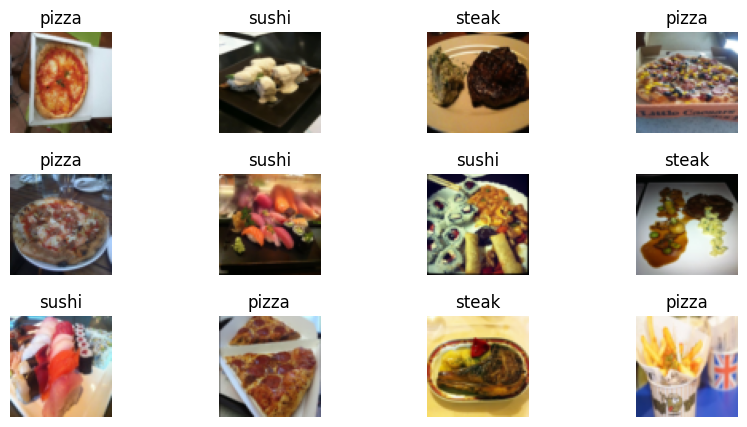

In [ ]:

def get_sample(dataset:torch.utils.data.Dataset,
                 n = 10 ,
                 seed = None):
    if seed:
      random.seed(seed)

    random_indexes = random.sample(range(len(dataset)) , k = n)
    print(random_indexes)
    return [dataset[idx] for idx in random_indexes]

data = get_sample(train_data , n = 12 , seed = 890)
f = plot(data)

In [ ]:
train_custom_loader = DataLoader(train_data ,
                                 batch_size = BATCH_SIZE,
                                 shuffle = True)
test_custom_loader = DataLoader(test_data ,
                                batch_size = BATCH_SIZE,
                                )

In [ ]:
images ,labels = next(iter(train_custom_loader))

Cols 6  Rows 6 , 32


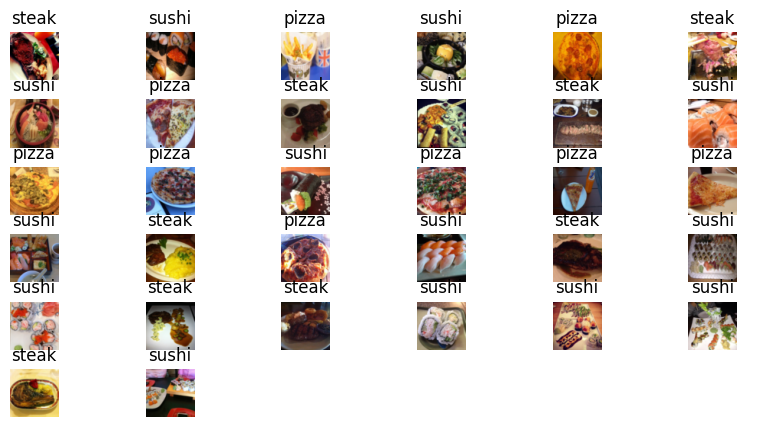

In [ ]:
data= list(zip(images , labels))
g = plot(data)

### ***Other Transforms***

* Some common ways are :
    - shift
    - Crop
    - zoom
    - Shear
    - resize
    - flip .....etc




### ***Loking at Trivial augment***

[40, 45, 62, 7, 66, 18, 73, 37, 15, 63, 1, 34, 50, 28, 61, 71]
Cols 4  Rows 4 , 16


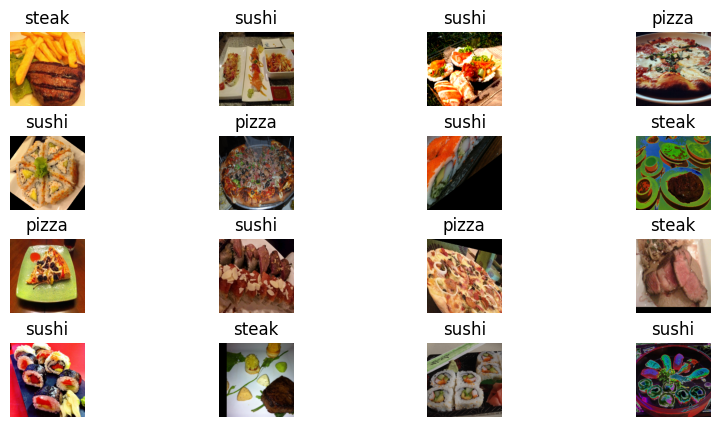

In [ ]:
from torchvision import transforms

train_transform_2 = transforms.Compose([
    transforms.Resize(size = (224 , 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()

])
test_transform_2 = transforms.Compose([
    transforms.Resize(size = (224 , 224))
    ,transforms.ToTensor()
])


testing = datasets.ImageFolder(root = test_dir,
                               transform = train_transform_2)

data = get_sample(testing , n = 16)
f = plot(data)

In [ ]:
data = get_sample(train_data)

[202, 210, 222, 192, 130, 106, 76, 216, 20, 74]


In [ ]:
images , labels = data[:][0] , data[:1]
len(images)

2

### ***First Model Without data Augmnetation***

Model used  is tiny vgg

In [ ]:
from torchvision import transforms  , datasets
from torch.utils.data import  DataLoader

In [ ]:
#without the augmenation


transform_1 = transforms.Compose([
    transforms.Resize(size = (64 , 64)),
    transforms.ToTensor()
])

In [ ]:
## datasets

train_data_1 = datasets.ImageFolder(root = train_dir,
                                    transform = transform_1,
                                  )
test_data_1 = datasets.ImageFolder(root = test_dir,
                                   transform = transform_1)

## data loader
BATCH_SIZE = 32

train_dataloader_1 = DataLoader(train_data_1,
                                batch_size = BATCH_SIZE,
                                shuffle = True)
test_dataloader_1 = DataLoader(test_data_1,
                               batch_size = BATCH_SIZE
                               )

In [ ]:



from torch import nn

class TinyVgg(nn.Module):

    def __init__(self , in_shape :int , hidden_units :int , out_shape :int) -> None:
        super().__init__()

        self.conv_block_1 = nn.Sequential(

          nn.Conv2d(in_shape ,
                    hidden_units ,
                    kernel_size = 2 ,
                    stride = 1 ,
                    padding = 0),
          nn.ReLU(),

          nn.Conv2d(hidden_units ,
                    hidden_units,
                    kernel_size = 2,
                    stride = 1,
                    padding = 0),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 2 , stride = 2)
        )

        self.conv_block_2 = nn.Sequential(
          nn.Conv2d(hidden_units , hidden_units ,
                    kernel_size = 2 ,
                    stride = 1 , padding = 0),
          nn.ReLU(),
          nn.Conv2d(hidden_units ,
                    hidden_units,
                    kernel_size = 2,
                    stride = 1,
                    padding = 0),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 2 , stride = 2)
        )
        self.block_3 = nn.Sequential(
          nn.Flatten(),
          nn.Linear(hidden_units * 14 *14 ,out_shape)
        )

    def forward(self , X):

      x = self.conv_block_1(X)

      # print(f"Out shape after 1'st Block {x.shape}")

      x = self.conv_block_2(x)

      # print(f"out shape after block 2{x.shape}")

      return self.block_3(x)

      # return self.block_3(self.conv_block_2(self.conv_block_1(X)))


In [ ]:
## find out inshape for the linear layer

device = 'cuda' if torch.cuda.is_available() else "cpu"

model_1 = TinyVgg(in_shape = 3 , out_shape = 3 , hidden_units = 10).to(device)


In [ ]:
rand_img = torch.randn(16,3 , 64 , 64).to(device)
test_batch , test_labels = next(iter(train_dataloader_1))

x = model_1(rand_img.to(device))
print(x.shape)

torch.Size([16, 3])


### ***Getting the models summary***

* using the torchinfo

In [ ]:
try :
  from tochinfo import summary
except Exception as e:
  ! pip install torchinfo -q
  from torchinfo import summary


In [ ]:
summary(model_1 , input_size = test_batch.shape)

Layer (type:depth-idx)                   Output Shape              Param #
TinyVgg                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 31, 31]          --
│    └─Conv2d: 2-1                       [32, 10, 63, 63]          130
│    └─ReLU: 2-2                         [32, 10, 63, 63]          --
│    └─Conv2d: 2-3                       [32, 10, 62, 62]          410
│    └─ReLU: 2-4                         [32, 10, 62, 62]          --
│    └─MaxPool2d: 2-5                    [32, 10, 31, 31]          --
├─Sequential: 1-2                        [32, 10, 14, 14]          --
│    └─Conv2d: 2-6                       [32, 10, 30, 30]          410
│    └─ReLU: 2-7                         [32, 10, 30, 30]          --
│    └─Conv2d: 2-8                       [32, 10, 29, 29]          410
│    └─ReLU: 2-9                         [32, 10, 29, 29]          --
│    └─MaxPool2d: 2-10                   [32, 10, 14, 14]          --
├─Sequentia

In [ ]:
model_1(torch.randn(1 , 3 , 64 , 64).to(device))

tensor([[ 0.0166, -0.0458, -0.0272]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


### ***Training and testing step***

* loss funtion -> `nn.CategoricalCrossenropy`
* Optimizer    ->  `nn.SGD()`

* create a training step and test step funtion

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optim = torch.optim.SGD(params = model_1.parameters() , lr = 0.01)

In [ ]:
def train_step(model:nn.Module ,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module ,
               optimizer : torch.optim.Optimizer,
               accuracy_fn = None,
               device = None):

  total_correct , total_loss , total_samples= 0 , 0 , 0
  train_acc = 0
  for batch , (X , y)  in enumerate(dataloader):
    X = X.to(device)
    y = y.to(device)

    model.train()

    y_logits = model(X)

    loss = loss_fn(y_logits , y)
    total_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(y_logits, dim=1)
    total_correct += (y_pred_class == y).sum().item()
    total_samples += y.size(0)

  average_loss = total_loss / len(dataloader)
  average_acc = total_correct / total_samples
  # print(f"here is train acc{train_acc}")
  if accuracy_fn:
    return average_loss , average_acc

  return average_loss , None

def test_step(model: nn.Module,
              dataloader: torch.utils.data.DataLoader,
              accuracy_fn,
              loss_fn: torch.nn.Module,
              device=device):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            X = X.to(device)
            y = y.to(device)

            y_logits = model(X)

            loss = loss_fn(y_logits, y)
            total_loss += loss.item()

            y_pred_class = torch.argmax(y_logits, dim=1)
            total_correct += (y_pred_class == y).sum().item()
            total_samples += y.size(0)

    average_loss = total_loss / len(dataloader)
    test_accuracy = total_correct / total_samples
    # print(f"Test Loss: {average_loss:.6f} | Test Accuracy: {test_accuracy:.6f}")

    return average_loss, test_accuracy

In [ ]:
from tqdm.auto import tqdm
try:
  from torchmetrics.classification import MulticlassAccuracy
except Exception as e:
  print("installing torchmetrics")
  !pip install torchmetrics -q torchmetrics
  from torchmetrics.classification import MulticlassAccuracy

accuracy_fn = MulticlassAccuracy(len(train_data_1.classes)).to(device)
epochs = 30

def train(model:torch.nn.Module ,
          epochs:int,
          train_dataloader :torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optim: torch.optim.Optimizer,
          loss_fn :torch.nn.Module,
          device = device):

  history = {
      "train_loss":[],
      "train_acc":[],
      'test_acc':[],
      "test_loss":[]
      }


  for epoch in tqdm(range(1 ,epochs+1)):
    train_loss , train_acc = train_step(model = model_1,
                                        dataloader = train_dataloader_1,
                                        loss_fn = loss_fn,
                                        optimizer = optim,
                                        device = device,
                                        accuracy_fn = accuracy_fn
                                        )

    test_loss , test_acc = test_step(model = model_1 ,
                                    dataloader = test_dataloader_1,
                                    accuracy_fn = accuracy_fn ,
                                    loss_fn = loss_fn,
                                    device = device)

    history['train_loss'].append(train_loss)
    history['test_loss'].append(test_loss)
    history['train_acc'].append(train_acc)
    history['test_acc'].append(test_acc)

    # print("===="* 70)
    info = "{} : Train Loss {:.3f} | Train Accuracy {:.3f} || Test Loss {:.3f} | Test Accuracy {:.3f}".format(epoch ,train_loss , train_acc , test_loss , test_acc)
    print(info)

  return history

In [ ]:
model_1 = TinyVgg(in_shape = 3 , out_shape = 3 , hidden_units = 10).to(device)
optim = torch.optim.Adam(params = model_1.parameters() , lr = 0.004)
history = train(model = model_1,
                epochs = 20,
                optim = optim,
                train_dataloader = train_dataloader_1,
                test_dataloader = test_dataloader_1,
                loss_fn = loss_fn,
                device = device)

  0%|          | 0/20 [00:00<?, ?it/s]

1 : Train Loss 1.116 | Train Accuracy 0.302 || Test Loss 1.181 | Test Accuracy 0.333
2 : Train Loss 1.104 | Train Accuracy 0.351 || Test Loss 1.106 | Test Accuracy 0.253
3 : Train Loss 1.101 | Train Accuracy 0.316 || Test Loss 1.105 | Test Accuracy 0.333
4 : Train Loss 1.098 | Train Accuracy 0.347 || Test Loss 1.104 | Test Accuracy 0.333
5 : Train Loss 1.097 | Train Accuracy 0.347 || Test Loss 1.104 | Test Accuracy 0.333
6 : Train Loss 1.098 | Train Accuracy 0.347 || Test Loss 1.106 | Test Accuracy 0.333
7 : Train Loss 1.096 | Train Accuracy 0.347 || Test Loss 1.109 | Test Accuracy 0.333
8 : Train Loss 1.095 | Train Accuracy 0.347 || Test Loss 1.111 | Test Accuracy 0.333
9 : Train Loss 1.097 | Train Accuracy 0.347 || Test Loss 1.113 | Test Accuracy 0.333
10 : Train Loss 1.105 | Train Accuracy 0.347 || Test Loss 1.115 | Test Accuracy 0.333
11 : Train Loss 1.094 | Train Accuracy 0.347 || Test Loss 1.113 | Test Accuracy 0.333
12 : Train Loss 1.097 | Train Accuracy 0.347 || Test Loss 1.114

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();



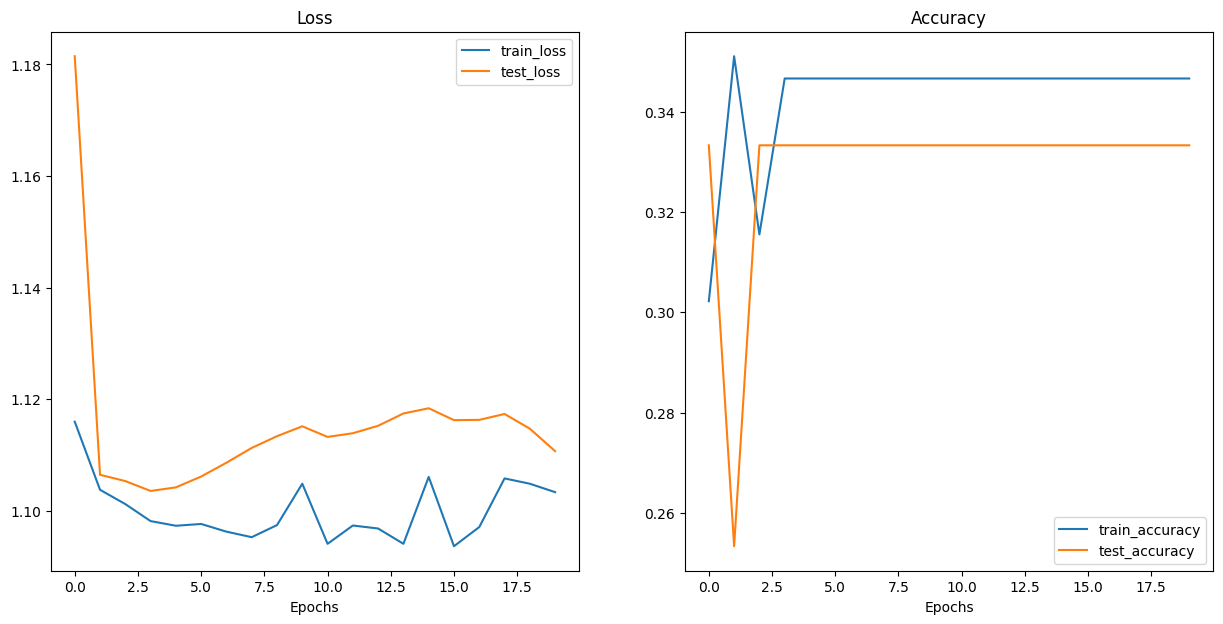

In [ ]:
plot_loss_curves(history)

### ***Over coming overfitting and under fitting***

* https://machinelearningmastery.com/using-learning-rate-schedule-in-pytorch-training/
* https://github.com/mrdbourke/pytorch-deep-learning/blob/main/04_pytorch_custom_datasets.ipynb


### ***Tiny Vgg with data augmentation***

In [ ]:
from torchvision import transforms


train_transform_2 = transforms.Compose([
    transforms.Resize(size = (64 , 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins =31),
    transforms.ToTensor(),

])
test_transform_2 = transforms.Compose([
    transforms.Resize(size = (64 , 64)),
    transforms.ToTensor()
])

## datasets
train_data_2 = datasets.ImageFolder(root = train_dir,
                                         transform = train_transform_2,
                                         )

test_data_2 = datasets.ImageFolder(root = test_dir ,
                                        transform = test_transform_2)


## data loaders
BATCH_SIZE = 6
train_dataloader_2 = DataLoader(train_dataset,
                                batch_size = BATCH_SIZE,
                                shuffle = True)
test_dataloader_2 = DataLoader(test_data_2 ,
                               batch_size = BATCH_SIZE,
                               shuffle = True)


Cols 3  Rows 2 , 6


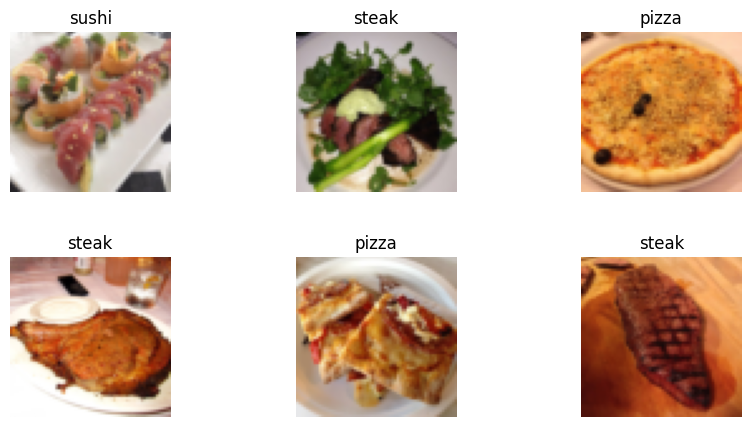

In [ ]:
images , labels = next(iter(train_dataloader_2))
data = list(zip(images , labels))
f = plot(data)

In [ ]:
class TinyVgg_2(nn.Module):

    def __init__(self, in_shape , out_shape , hidden_units):
      super().__init__()

      self.block_1 = nn.Sequential(

          nn.Conv2d(in_shape , hidden_units ,
                    kernel_size = 3,
                    stride = 1,
                    padding = 0),
          nn.ReLU(),

          nn.Conv2d(hidden_units ,
                    hidden_units ,
                    kernel_size = 3,
                    padding = 0),

          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 3 , stride = 2)
        )

      self.block_2 = nn.Sequential(
          nn.Conv2d(hidden_units , hidden_units ,
                    kernel_size = 3,
                    stride = 1,
                    padding = 0),
          nn.ReLU(),
          nn.Conv2d(hidden_units ,
                    hidden_units ,
                    kernel_size = 3,
                    padding = 0),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 3 , stride = 2)
        )


      self.linear = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features = hidden_units *12*12 ,
                    out_features = out_shape)
      )

    def forward(self , X):

      x = self.block_1(X)

      # print(f"1:{x.shape}")

      x = self.block_2(x)

      # print(f"2: {x.shape}")

      return self.linear(x)




In [ ]:
from torchinfo import summary

device = 'cuda' if torch.cuda.is_available() else "cpu"

model_2 = TinyVgg_2(in_shape = 3,
              out_shape = 3,
              hidden_units = 20).to(device)

loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params = model_2.parameters() , lr = 1e-02)



summary(model_2, input_size = test_batch.shape)

Layer (type:depth-idx)                   Output Shape              Param #
TinyVgg_2                                [32, 3]                   --
├─Sequential: 1-1                        [32, 20, 29, 29]          --
│    └─Conv2d: 2-1                       [32, 20, 62, 62]          560
│    └─ReLU: 2-2                         [32, 20, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 20, 60, 60]          3,620
│    └─ReLU: 2-4                         [32, 20, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 20, 29, 29]          --
├─Sequential: 1-2                        [32, 20, 12, 12]          --
│    └─Conv2d: 2-6                       [32, 20, 27, 27]          3,620
│    └─ReLU: 2-7                         [32, 20, 27, 27]          --
│    └─Conv2d: 2-8                       [32, 20, 25, 25]          3,620
│    └─ReLU: 2-9                         [32, 20, 25, 25]          --
│    └─MaxPool2d: 2-10                   [32, 20, 12, 12]          --
├─Seq

In [ ]:
train

<function __main__.train(model: torch.nn.modules.module.Module, epochs: int, train_dataloader: torch.utils.data.dataloader.DataLoader, test_dataloader: torch.utils.data.dataloader.DataLoader, optim: torch.optim.optimizer.Optimizer, loss_fn: torch.nn.modules.module.Module, device='cuda')>

In [ ]:
history_2 = train(model = model_2,
                  epochs = 20,
                  train_dataloader = train_dataloader_2,
                  test_dataloader = test_dataloader_2,
                  optim = optim,
                  loss_fn = loss_fn ,
                  device = device)

  0%|          | 0/20 [00:00<?, ?it/s]

1 : Train Loss 1.097 | Train Accuracy 0.347 || Test Loss 1.111 | Test Accuracy 0.333
2 : Train Loss 1.103 | Train Accuracy 0.347 || Test Loss 1.111 | Test Accuracy 0.333
3 : Train Loss 1.103 | Train Accuracy 0.347 || Test Loss 1.111 | Test Accuracy 0.333
4 : Train Loss 1.097 | Train Accuracy 0.347 || Test Loss 1.111 | Test Accuracy 0.333
5 : Train Loss 1.103 | Train Accuracy 0.347 || Test Loss 1.111 | Test Accuracy 0.333
6 : Train Loss 1.094 | Train Accuracy 0.347 || Test Loss 1.111 | Test Accuracy 0.333
7 : Train Loss 1.103 | Train Accuracy 0.347 || Test Loss 1.111 | Test Accuracy 0.333
8 : Train Loss 1.097 | Train Accuracy 0.347 || Test Loss 1.111 | Test Accuracy 0.333
9 : Train Loss 1.094 | Train Accuracy 0.347 || Test Loss 1.111 | Test Accuracy 0.333
10 : Train Loss 1.094 | Train Accuracy 0.347 || Test Loss 1.111 | Test Accuracy 0.333
11 : Train Loss 1.097 | Train Accuracy 0.347 || Test Loss 1.111 | Test Accuracy 0.333
12 : Train Loss 1.097 | Train Accuracy 0.347 || Test Loss 1.111

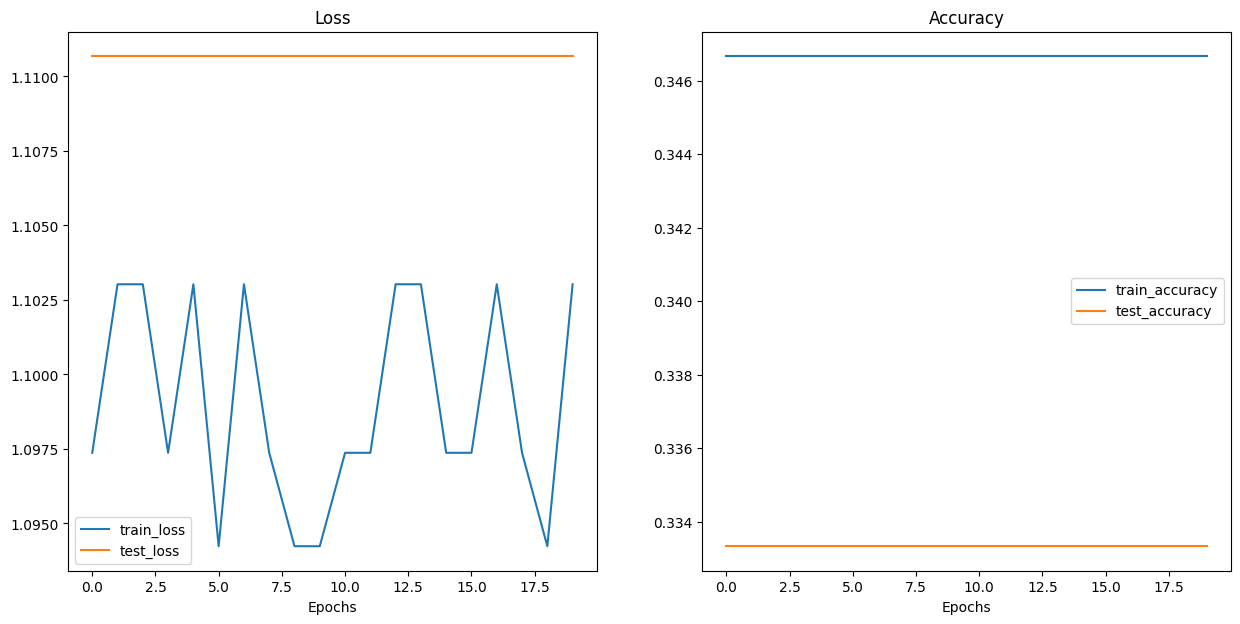

In [ ]:
plot_loss_curves(history_2)

### ***Comparing diffrent models perfomance***

* Using pytorch and tensorboard
* Ploting loss curves by ardcoding
* Weigts and biases

In [ ]:
from torchmetrics.classification import MulticlassAUROC  , MulticlassConfusionMatrix , MulticlassPrecision , MulticlassRecall , MulticlassF1Score
from torchmetrics.classification import MulticlassAccuracy as accuracy_fn

from sklearn.metrics import classification_report
from timeit import default_timer as timer


def eval_model(model:torch.nn.Module ,
               dataloader : torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               num_classes,
               model_name = None ,
               full_report = False,
               device = None):


  """
    Evaluate the performance of a PyTorch model on a given dataset.

    Args:
    - model (torch.nn.Module): The PyTorch model to evaluate.
    - dataloader (torch.utils.data.DataLoader): DataLoader containing the evaluation dataset.
    - loss_fn (torch.nn.Module): Loss function used for evaluation.
    - accuracy_fn: Function to calculate accuracy.
    - num_classes (int): Number of classes in the classification task.
    - model_name (str, optional): Name of the model. Default is None.
    - full_report (bool, optional): Whether to return a detailed report for each batch. Default is False.
    - device 'cpu' / 'cuda'

    Returns:
    - dict or dict of dicts: Evaluation results. If full_report is False, returns a dictionary with average metrics.
      If full_report is True, returns a dictionary containing lists of metrics for each batch, along with average metrics.

  """

  if device == None:
    device = "cuda" if torch.cuda.is_available() else "cpu"

  model.to(device)
  model_eval = {
      "NAME":model_name,
      "auroc":[],
      "report":[],
      "Matrix":[],
      "accuracy":[],
      "loss":[],
      "f1_score":[],
      "recall":[],
      "precision":[],
      "inference_time":[]
  }


  accuracy_fn = accuracy_fn(num_classes = num_classes).to(device)

  with torch.inference_mode():
    accuracy , loss = 0 , 0

    for (X_test , y_test)  in tqdm(dataloader):

        X_test = X_test.to(device)
        y_test = y_test.to(device)

        start = timer()
        test_pred = model(X_test)

        end = timer()
        duration = end - start

        pred_probs = torch.softmax(test_pred , dim = 1)

        current_loss =  loss_fn(test_pred , y_test)
        loss +=current_loss

        current_accuracy = accuracy_fn(y_test ,test_pred.argmax(dim = 1))
        accuracy += current_accuracy

        auroc = MulticlassAUROC(num_classes)
        Precision = MulticlassPrecision(num_classes)
        Recall = MulticlassRecall(num_classes)
        F1_score  = MulticlassF1Score(num_classes)


        ### Transfering the pred probs to cpu for evaluation
        if device == 'cuda':
          pred_probs = pred_probs.to('cpu')
          y_test = y_test.to("cpu")
          test_pred = test_pred.to("cpu")

        auroc_score  = auroc( torch.softmax(test_pred , dim = 1) , y_test)
        f1_score = F1_score(pred_probs , y_test)
        recall_score = Recall(pred_probs , y_test )
        precision_score = Precision(pred_probs , y_test)

        report = classification_report(y_test,test_pred.argmax(dim = 1))

        conf_matrix = MulticlassConfusionMatrix(num_classes)
        conf_m = conf_matrix(pred_probs , y_test)

        model_eval["auroc"].append(auroc_score)
        model_eval['precision'].append(precision_score)
        model_eval['recall'].append(recall_score)
        model_eval['f1_score'].append(f1_score)

        model_eval["report"].append(report)
        model_eval["Matrix"].append(conf_matrix)

        model_eval["accuracy"].append(current_accuracy)
        model_eval["loss"].append(current_loss)
        model_eval['inference_time'].append(duration)


    loss = float(loss/len(dataloader))
    accuracy = float(accuracy /len(dataloader))

    model_eval["AV_ACC"] = accuracy
    model_eval["AV_LOSS"] = loss

    average_recall = float(torch.tensor(model_eval['recall']).mean())
    average_precision = float(torch.tensor(model_eval['precision']).mean())
    average_f1 = float(torch.tensor(model_eval['f1_score']).mean())
    average_auroc = float(torch.tensor(model_eval['auroc']).mean())
    total_time = sum(model_eval['inference_time'])
    time_per_batch = float(torch.tensor(model_eval['inference_time']).mean())

    average_report = {
        "MODEL_NAME":model_name,
        "ACCURACY":accuracy,
        "LOSS":loss,
        "AUROC":average_auroc,
        "RECALL":average_recall,
        "F1_SCORE":average_f1,
        "PRECISION":average_precision,
        "TOTAL_TIME":total_time,
        "BATCH_TIME":time_per_batch
      }

  if full_report:
    return  model_eval , average_report
  return None  , average_report





In [ ]:
full_report_1 , half_report_1 = eval_model(
    model = model_1,
    dataloader = test_dataloader_1,
    loss_fn = loss_fn ,
    model_name = "Model_1",
    device = device,
    accuracy_fn = accuracy_fn ,
    num_classes = 3
)

full_report_2 , half_report_2 = eval_model(
    model = model_2 ,
    dataloader = test_dataloader_2,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device ,
    num_classes = 3,
    model_name = "Model_2"
)


  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and 

  0%|          | 0/13 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:

import pandas as pd

df = pd.DataFrame(
    [half_report_1,
    half_report_2]
)

In [ ]:
df.head()

,MODEL_NAME,ACCURACY,LOSS,AUROC,RECALL,F1_SCORE,PRECISION,TOTAL_TIME,BATCH_TIME
0,Model_1,0.130208,1.110677,0.222222,0.166667,0.146199,0.130208,0.003564,0.001188
1,Model_2,0.280128,1.094557,0.465385,0.389957,0.276374,0.280128,0.060148,0.004627


/content/data/Image/test/sushi
/content/data/Image/test/pizza
/content/data/Image/test/pizza
/content/data/Image/test/pizza
/content/data/Image/test/pizza


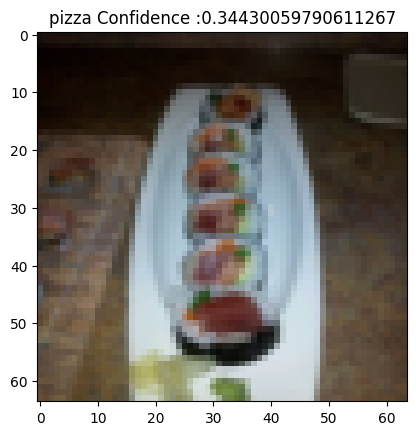

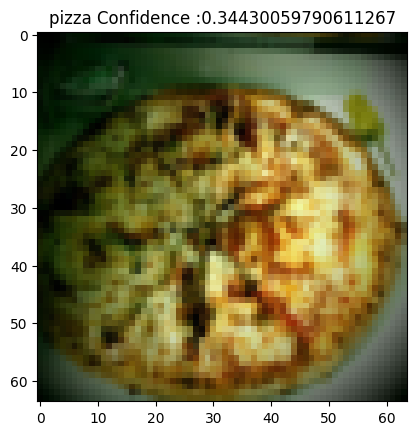

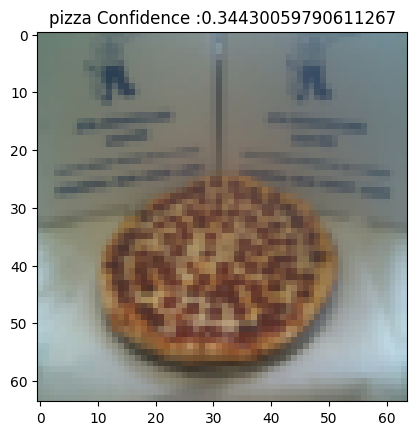

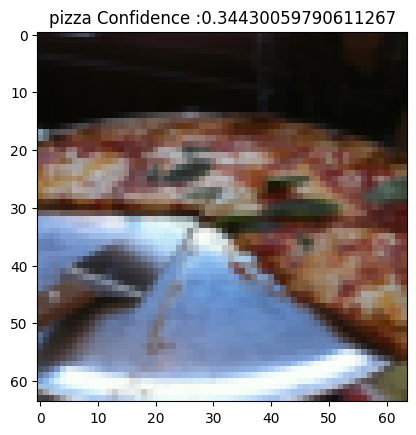

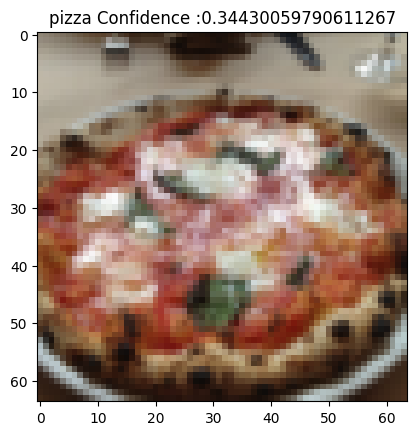

In [ ]:
from typing import List , Dict
from torchvision import transforms
from torchvision.io import read_image

def scale(image):
  return image / 255.0


loading_transfrom = transforms.Compose([
    read_image,
    scale,
    transforms.Resize(size = (64 , 64)),
    transforms.RandomHorizontalFlip(p = 0.7)

])

def get_predictions(model:torch.nn.Module,
                    images_paths:List[str],
                    mapping_dict:Dict,
                    loading_transform,
                    device = device,
                    plot = True
                    ) -> list[str]:

  """
  takes in a list of paths
  Returns the predicted image name"""

  dict_ = {value:key for key , value in list(mapping_dict.items())}

  model.eval()
  model.to(device)

  data = []
  with torch.inference_mode():
    for image in images_paths:
      image = loading_transform(image).type(torch.float32)
      image = image.unsqueeze(dim = 0).to(device)
      prediction = model(image)

      image =image.squeeze(dim = 0)

      pred_probability = torch.softmax(prediction , dim = 1)
      name = dict_[int(pred_probability.argmax(dim = 1))]
      confidence = torch.max(pred_probability)
      image = image.squeeze(dim =0).permute(1,2,0).cpu()

      data.append((image ,name, confidence))

  if plot:
    for image , name , confidence in data:
      plt.figure()
      plt.title(f"{name} Confidence :{confidence}")
      plt.imshow(image)
      plt.plot()

  return data

from pathlib import Path
import glob

source_dir = Path("/content/data/Image/test")

images = glob.glob("/content/data/Image/test"+"/*/*.jpg")

import random


imgs = random.sample(images , 5)
for i in imgs:
  print(os.path.dirname(i))

mapping_dict = dict([(class_ , i) for i , class_ in enumerate(classes_to_idx) ])
data = get_predictions(model = model_1,
                images_paths =imgs,
                mapping_dict = mapping_dict,
                loading_transform = loading_transfrom,
                device = device)





In [ ]:
summary(model=model_2 , input_size = (32, 3 , 64 , 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVgg_2                                [32, 3]                   --
├─Sequential: 1-1                        [32, 20, 29, 29]          --
│    └─Conv2d: 2-1                       [32, 20, 62, 62]          560
│    └─ReLU: 2-2                         [32, 20, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 20, 60, 60]          3,620
│    └─ReLU: 2-4                         [32, 20, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 20, 29, 29]          --
├─Sequential: 1-2                        [32, 20, 12, 12]          --
│    └─Conv2d: 2-6                       [32, 20, 27, 27]          3,620
│    └─ReLU: 2-7                         [32, 20, 27, 27]          --
│    └─Conv2d: 2-8                       [32, 20, 25, 25]          3,620
│    └─ReLU: 2-9                         [32, 20, 25, 25]          --
│    └─MaxPool2d: 2-10                   [32, 20, 12, 12]          --
├─Seq

In [ ]:
im = read_image(imgs)